**Import**

In [63]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import tqdm
import random

**Get Data**

In [30]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hbchaitanyabharadwaj/audio-dataset-with-10-indian-languages")

print("Path to dataset files:", path)

100%|██████████| 17.9G/17.9G [04:07<00:00, 77.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/hbchaitanyabharadwaj/audio-dataset-with-10-indian-languages/versions/1


**Generate Dataset**

In [58]:
def extract_mfcc(audio_path, n_mfcc=13):
    # Load audio file
    y, sr = librosa.load(audio_path, sr=None)

    # Compute MFCC features
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

    return mfccs, sr

def plot_mfcc(mfccs, sr):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, x_axis='time', sr=sr)
    plt.colorbar(label='MFCC Coefficients')
    plt.title('MFCCs')
    plt.xlabel('Time')
    plt.ylabel('MFCC Coefficients')
    plt.show()

def generate_features(mfccs):
  mean_feature = [float(x) for x in list(np.mean(mfccs, axis=1))]
  std_feature = [float(x) for x in list(np.std(mfccs, axis=1))]
  min_feature = [float(x) for x in list(np.min(mfccs, axis=1))]
  max_feature = [float(x) for x in list(np.max(mfccs, axis=1))]
  features = mean_feature + std_feature + min_feature + max_feature
  return features

def generate_dataset(data_path):
  all_data = []
  labels = []
  for folder in os.listdir(data_path):
    for cls_label in os.listdir(os.path.join(data_path, folder)):
      for index, audio_file in tqdm.tqdm(enumerate(os.listdir(os.path.join(data_path, folder, cls_label)))):
        audio_file_path = os.path.join(data_path, folder, cls_label, audio_file)
        mfccs, _ = extract_mfcc(audio_file_path)
        features = generate_features(mfccs)
        all_data.append(features)
        labels.append(cls_label)

        # select 1000 files from each language
        if index == 999:
          break

  # define feature names
  columns = ["f"+str(i) for i in range(len(all_data[0]))]

  # define dataframe
  df = pd.DataFrame(data=all_data, columns=columns)
  df["class_label"] = labels
  return df

In [59]:
# generate dataset
df = generate_dataset(path)

999it [00:44, 22.51it/s]
999it [00:43, 22.83it/s]
999it [00:47, 20.91it/s]
999it [00:45, 21.84it/s]
999it [00:48, 20.56it/s]
999it [00:41, 24.18it/s]
999it [00:52, 18.99it/s]
999it [00:47, 21.08it/s]
999it [00:48, 20.77it/s]
999it [00:48, 20.67it/s]


In [60]:
# save data
df.to_csv("train_data_SU_A2_q2.csv", index=False)

**Plot Spectrograms**

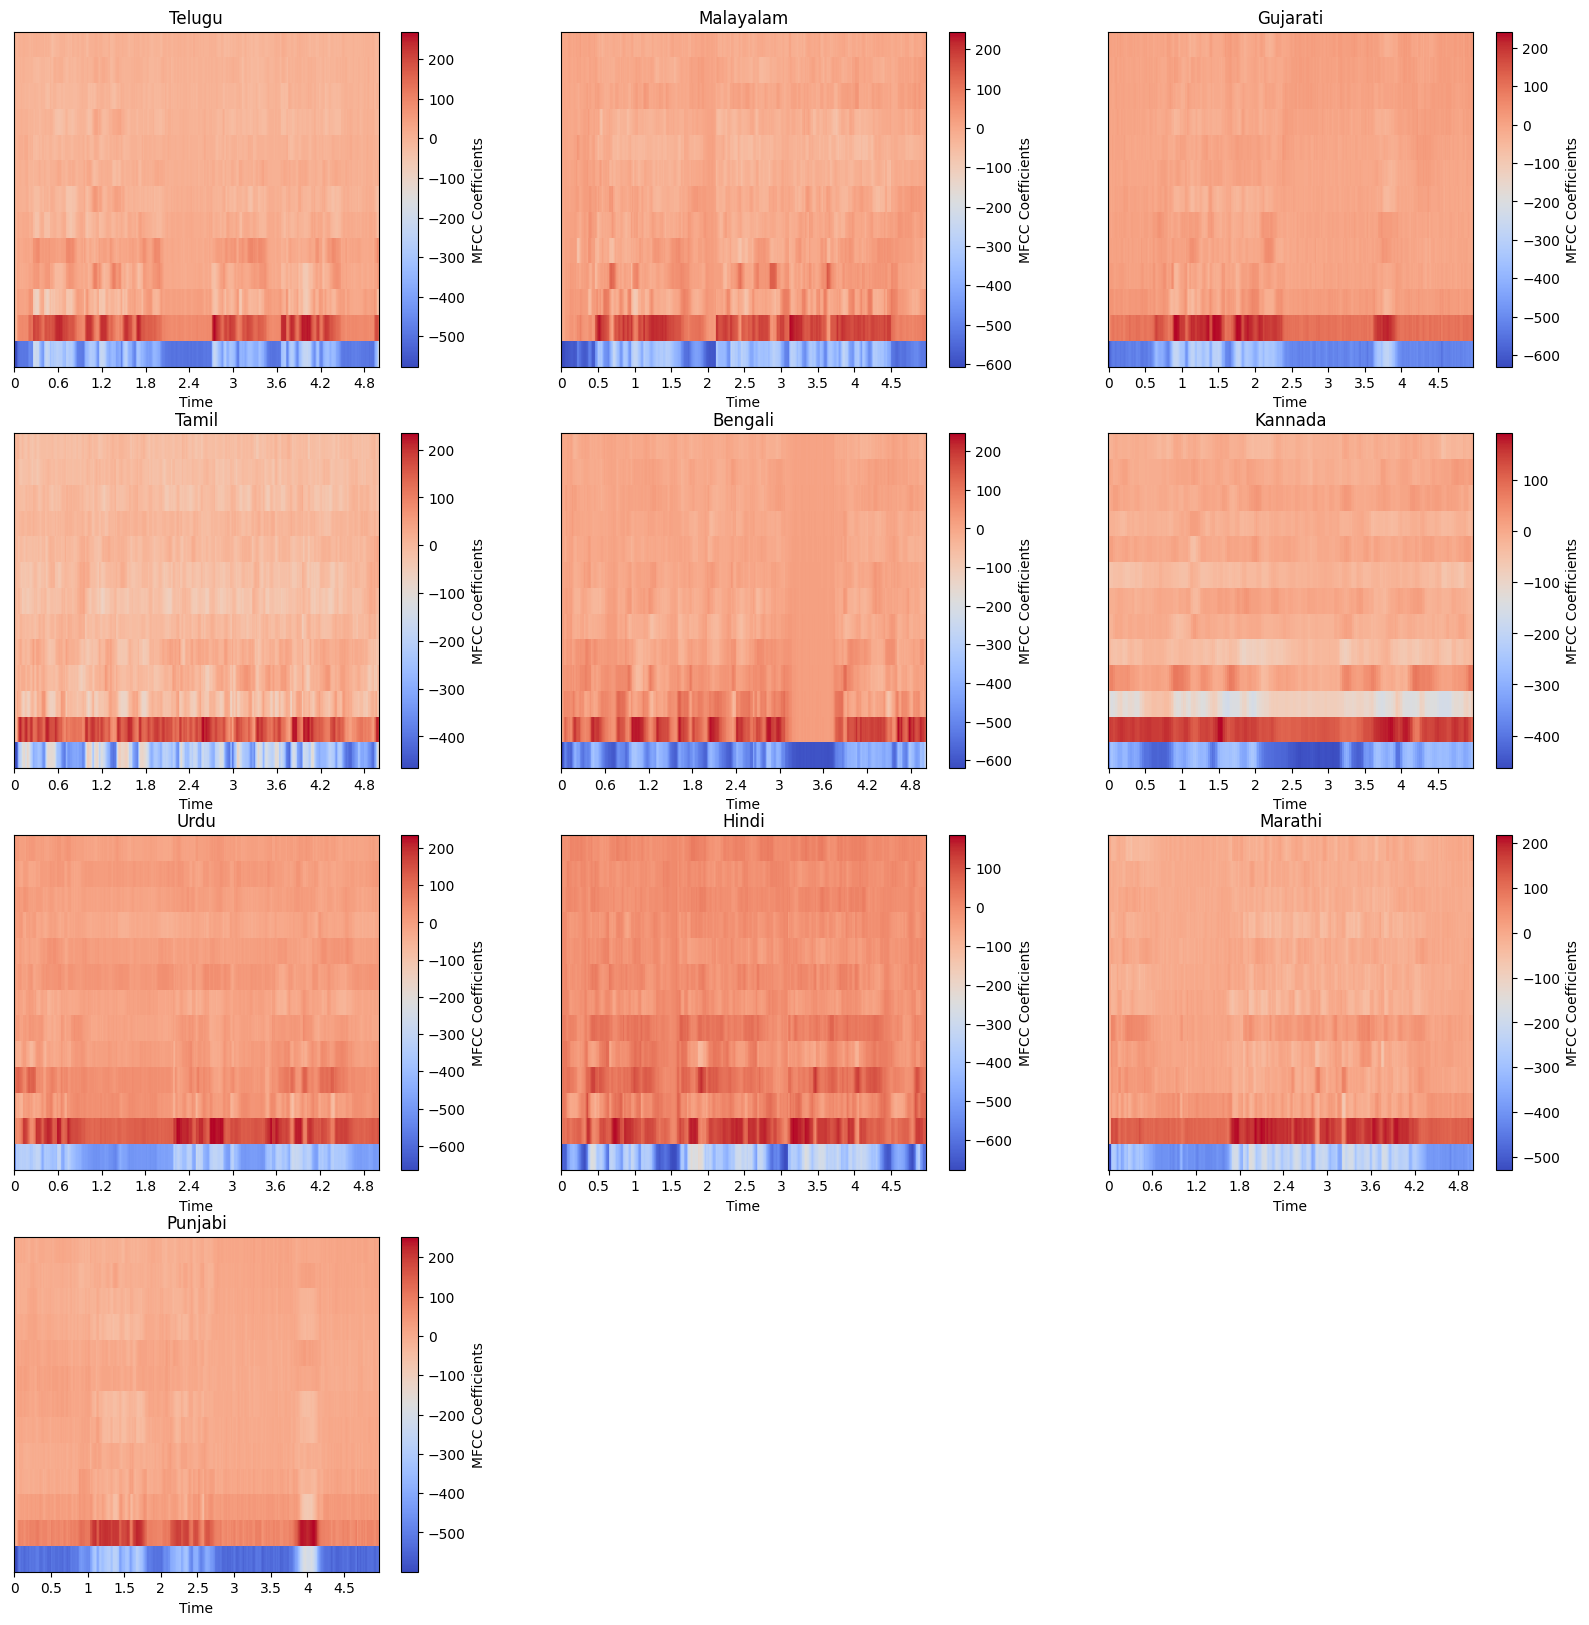

In [79]:
# plot Spectrogram for selected samples
def plot_mfcc(mfccs):
    plt.figure(figsize=(20, 20))
    for i in range(len(mfccs)):
      plt.subplot(4, 3, i+1)
      librosa.display.specshow(mfccs[i]["mfcc"], x_axis='time', sr=mfccs[i]["sr"])
      plt.colorbar(label='MFCC Coefficients')
      plt.title(mfccs[i]["language"])
    plt.savefig("mfccs_plot.png")

all_spectrogram = []
for folder in os.listdir(path):
    for cls_label in os.listdir(os.path.join(path, folder)):
      audio_files = os.listdir(os.path.join(path, folder, cls_label))
      # select 1 random samples
      audio_file = random.sample(audio_files, 1)
      mfccs, sr = extract_mfcc(os.path.join(path, folder, cls_label, audio_file[0]))
      all_spectrogram.append({"mfcc": mfccs,
                              "sr": sr,
                              "language": cls_label})
plot_mfcc(all_spectrogram)